# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [1]:
### SOME IMPORTS
import common as cm
import numpy as np
import matplotlib.pyplot as plt

1.1) Complete the following distance function

In [3]:
import math


# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    dist = math.sqrt((A[0] - B[0]) ** 2 + (A[1] - B[1]) ** 2)
    return dist
    
# Test cases
tests = [
    ([0.0, 0.0], [0.0, 1.0], 1.0),
    ([0.0, 0.0], [1.0, 1.0], math.sqrt(2)),
    ([2.0, 3.0], [5.0, 7.0], 5.0)
]

for A, B, expected in tests:
    result = getEuclideanDistance(A, B)
    print(f"A={A}, B={B} -> {result} (expected: {expected})")
    assert math.isclose(result, expected), "Test failed!"

print("All tests passed")

A=[0.0, 0.0], B=[0.0, 1.0] -> 1.0 (expected: 1.0)
A=[0.0, 0.0], B=[1.0, 1.0] -> 1.4142135623730951 (expected: 1.4142135623730951)
A=[2.0, 3.0], B=[5.0, 7.0] -> 5.0 (expected: 5.0)
All tests passed


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

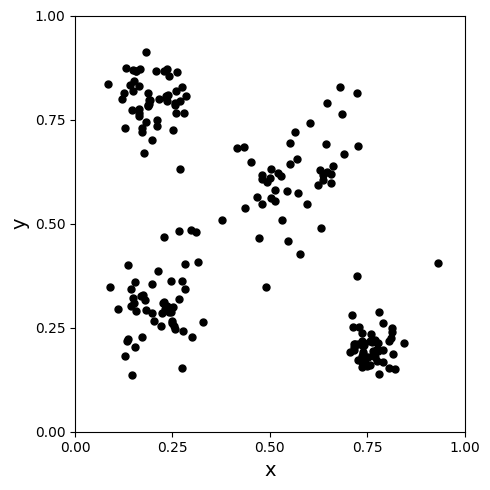

In [4]:
data = cm.getTestDataSet()
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

In [ ]:
4

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

[[0.25980258928914035, 0.7655116779002312], [0.18693830608897657, 0.7834271584229567], [0.2323892511073395, 0.8060266414635234], [0.18245127527368585, 0.7431398467959367], [0.2098729415587089, 0.7344682346313631], [0.18853229067689722, 0.7842951000809403], [0.26912569720966584, 0.7957361528430443], [0.19020098972108546, 0.7975175323493953], [0.25085655998780676, 0.7246018248223394], [0.23532339919378903, 0.871543741261008], [0.12962857187109472, 0.873595307576713], [0.16401114075234427, 0.7755297044641337], [0.16308955536890288, 0.8316926011744782], [0.18106441442797522, 0.9119848308841574], [0.165411426713162, 0.7653802653838561], [0.23742600682065826, 0.8080106874749717], [0.15264496361992702, 0.8414462176171933], [0.23463371747059406, 0.8019563670471643], [0.16481091484141902, 0.7577539191560507], [0.15633882350658837, 0.8655833090434761], [0.2837812257433207, 0.8077914273778376], [0.2581598534580727, 0.8188071959347848], [0.14944464908218136, 0.8197394818883317], [0.214382889396676

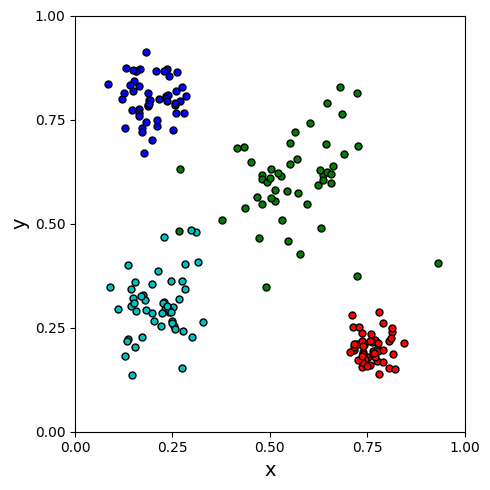

In [5]:
data = cm.getTestDataSet()
print(data)
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [6]:
from numpy.random import random


### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(K, data):
    data = data.copy()
    np.random.shuffle(data)
    centroids = data[:K]
    return centroids

print(getCentroids(2, data))

[[0.7915824963626531, 0.1685113727552806], [0.23532339919378903, 0.871543741261008]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [9]:
def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):    
    NO_CHANGE = True
    if ASSIGNMENTS is None: NO_CHANGE = False
    #TODO

    
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for k in range(K)]
    ### TODO


    for i, point in enumerate(DATA):
        dists = []
        for centroid in CENTROIDS:
            dists.append(getEuclideanDistance(point, centroid))
        nearest = dists.index(min(dists))
        NEW_ASSIGNMENTS[nearest].append(i)

    if ASSIGNMENTS != NEW_ASSIGNMENTS:
        NO_CHANGE = False
    else:
        NO_CHANGE = True

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    ### TODO
    for assignment in NEW_ASSIGNMENTS:
        if len(assignment) > 0:
            mean_x = sum(DATA[index][0] for index in assignment) / len(assignment)
            mean_y = sum(DATA[index][1]  for index in assignment) / len(assignment)
            NEW_CENTROIDS.append([mean_x, mean_y])
    
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS 

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

False


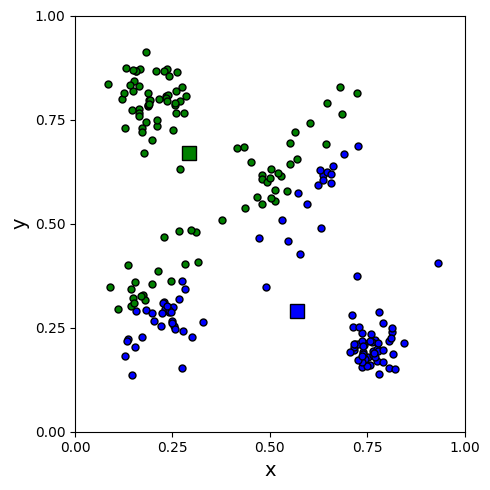

In [10]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
print(NO_CHANGE)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

In [16]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = [[] for i in range(K)]
    for i in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS.copy(), ASSIGNMENTS)
        if NO_CHANGE is True:
            print("For K = ", K, ", ", i, " iterations are needed")
            break
        
    return DATA, CENTROIDS, ASSIGNMENTS   

DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = 2)

For K =  2 ,  3  iterations are needed


1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

In [17]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)

For K =  2 ,  3  iterations are needed
For K =  3 ,  3  iterations are needed
For K =  4 ,  7  iterations are needed
For K =  5 ,  4  iterations are needed
For K =  6 ,  12  iterations are needed
For K =  7 ,  12  iterations are needed
For K =  8 ,  6  iterations are needed
For K =  9 ,  8  iterations are needed
For K =  10 ,  7  iterations are needed


## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

In [18]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    total = 0.0
    for k in range(len(CENTROIDS)):
        centroid = CENTROIDS[k]
        indices = ASSIGNMENTS[k]
        for idx in indices:
            point = DATA[idx]
            total += getEuclideanDistance(point, centroid)
    return total


For K =  2 ,  5  iterations are needed
For K =  3 ,  2  iterations are needed
For K =  4 ,  3  iterations are needed
For K =  5 ,  10  iterations are needed
For K =  6 ,  11  iterations are needed
For K =  7 ,  6  iterations are needed
For K =  8 ,  7  iterations are needed
For K =  9 ,  20  iterations are needed
For K =  10 ,  8  iterations are needed


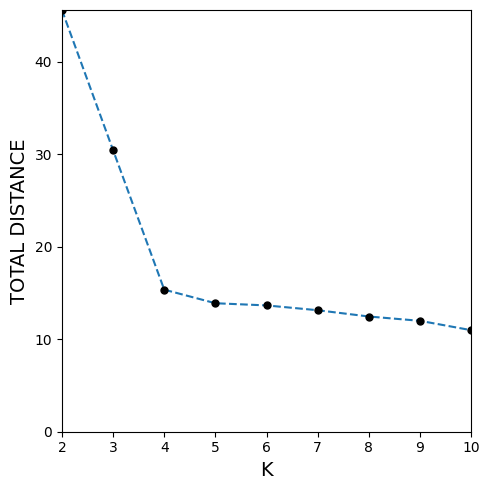

In [19]:
### PERFORM THE ANALYSIS HERE
DATA = cm.getTestDataSet()
results = []

for k in range(2, 10+1):
    CENTS = getCentroids(k, DATA)
    DATA_F, CENT_F, ASSGN_F = doKMeans(DATA, CENTS, K = k)
    dist = getTotalDistance(DATA_F, CENT_F, ASSGN_F)
    results.append([k, dist])

cm.displayResults(plt, results)

# Part 3 - a small case study

In this exercise you are asked to use the K-Means algorithm to cluster some data provided in cm.getCaseDataSet() (important note, this data was generated artificially - this is not real-world data). This data contains information on 250 persons. Each person is characterized with the following attributes:

a) Age <br>
b) Salary (zł) <br> 
c) Health index (0-100; 0 = worst health, 100 = best health) <br>
d) Time spent in school or work (hours) <br>
e) Time spent on sport activities (hours) <br>

Follow these steps:
1. Load the data. 
2. Check the min and max values for each attribute and consider normalization. 
3. Run K-Means algorithm (use the pieces of code you completed in previous exercises) for different K. 
4. Identify the best K using the performance indicator introduced in Part 2. 
5. For the best K - analyze constructed clusters. 
    * Compute basic stats (mean, max, min and standard deviation) attribute values within each cluster. You should use centroids constructed in the final iteration. 
    * (optional) Generate distribution plots. 
    * (optional) Calculate the internal consistency of clusters by calculating basic stats (mean, max, min and standard deviation) of distance between each pair of objects in each cluster and visualize this data.
    * (optional) Compute basic stats (mean, max, min and standard deviation) of distance between each pair of clusters and visualize this data.
    * You can print these values / show pandas DataFrame / visualize them with matplotlib boxplot (optional). 
    * Values should be presented in a non-normalized version.
6. Using the above, briefly describe each cluster.

In [21]:
DATA = cm.getCaseDataSet()
print(DATA[:5])


[[25.590935953105394, 254.0269277334078, 48.8679094350702, 17.88927828319997, 6.733478416981255], [24.849425201658885, 331.7569431879702, 76.49823071710553, 10.657911584484529, 13.806613626836388], [21.632865066322584, 280.00556128576466, 56.143597320140856, 15.93600992621127, 4.936960064476113], [25.00881054070244, 150.98987481761787, 64.9838132889438, 18.375106109066767, 8.90270658793547], [18.576247438628066, 197.80730463587426, 80.81324634012407, 12.324748428084193, 2.5084653815549656]]


In [22]:
### CONSIDER NORMALIZATION HERE
def normalizeData(DATA):
    DATA = np.array(DATA, float)
    mins = DATA.min(axis=0)
    maxs = DATA.max(axis=0)
    norm = (DATA - mins) / (maxs - mins)
    return norm, mins, maxs

DATA_N, mins, maxs = normalizeData(DATA)

In [23]:
def doKMeans_CaseStudy(DATA, K = 2, M = 5):
    CENTROIDS = getCentroids(K, DATA) # GET CENTOIDS
    ASSIGNMENTS = [[] for i in range(K)] #
    for _ in range(100):
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS.copy(), ASSIGNMENTS)
        if NO_CHANGE is True:
            break

    return DATA, CENTROIDS, ASSIGNMENTS

DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(DATA_N, K = 2)

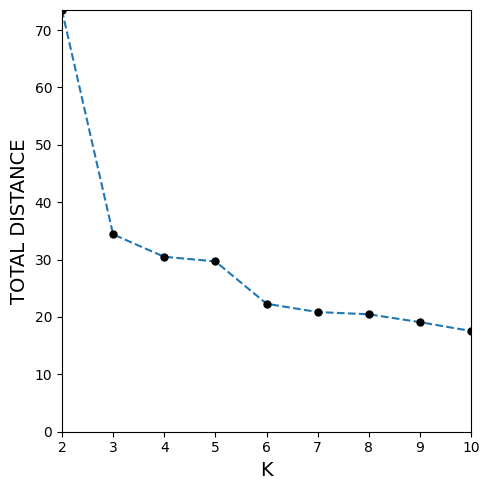

In [25]:
### DO THE ANALYSIS HERE (FIND ELBOW)
results_case = []

for k in range(2, 11):
    DATA_F, CENT_F, ASSGN_F = doKMeans_CaseStudy(DATA_N, K=k, M=5)
    d = getTotalDistance(DATA_F, CENT_F, ASSGN_F)
    results_case.append([k, d])

cm.displayResults(plt, results_case)

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

In [26]:
### DISPLAY - SUMMARIZE - STATS FOR THE BEST K FOUND IN THE PREVIOUS STEP
bestK = 3
DATA_F, CENT_F, ASSGN_F = doKMeans_CaseStudy(DATA_N, K=bestK, M=5)


In [27]:
import statistics as st

for k in range(bestK):
    print("\nCluster", k+1)
    idxs = ASSGN_F[k]
    cluster = [DATA[i] for i in idxs]

    for j in range(5):
        vals = [obj[j] for obj in cluster]
        print(
            f"Attr {j}:",
            "min=", min(vals),
            "max=", max(vals),
            "mean=", sum(vals)/len(vals),
            "std=", st.pstdev(vals)
        )


Cluster 1
Attr 0: min= 15.012362258670485 max= 36.853083616766504 mean= 21.644690565030704 std= 3.591722829771853
Attr 1: min= 5.682015914647337 max= 2187.5198556077435 mean= 827.371745158321 std= 671.4673387338446
Attr 2: min= 24.446376274815762 max= 99.881408211431 mean= 54.00266275252987 std= 22.059208608863052
Attr 3: min= 10.657911584484529 max= 50.72842179502887 mean= 28.459914766166026 std= 12.333552062895292
Attr 4: min= 0.3201738641144276 max= 17.72059446085231 mean= 6.070635245115172 std= 5.3125021610404906

Cluster 2
Attr 0: min= 44.322357483018926 max= 79.5991240593619 mean= 66.46420061469549 std= 7.143245831235238
Attr 1: min= 1291.1384999397003 max= 3946.3612862111086 mean= 1943.748832113294 std= 537.416338545535
Attr 2: min= 12.913542297443495 max= 68.91541945494238 mean= 30.276670102333654 std= 13.076071887734791
Attr 3: min= 0.02237807600858785 max= 59.33418479333115 mean= 13.659113991968368 std= 19.48343768989788
Attr 4: min= 0.11155649970376369 max= 14.8227424659505